In [1]:
from scrape_data import WikiUrl, SourceHtml, get_frequency_for_group
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import string

/usr/lib/python3/dist-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.22) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


### This was a programming challenge for one of the jobs I applied for. The goal was to analyse letter frequency for pages in English vs pages in German. Then, you should build a model, which predicts the language based only on the letter distribution.

In [2]:
url_obj = WikiUrl('https://en.wikipedia.org/wiki/Vinted')
content = url_obj.html

In [3]:
content[:500]

'\n<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Vinted - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XpiG-ApAAL0AALK@6hYAAAAQ","wgCSPNonce":!1,"wgCan'

In [4]:
url_obj = WikiUrl('https://en.wikipedia.org/wiki/Vinted')
print(url_obj.lang)

EN


In [5]:
url_obj = WikiUrl('https://de.wikipedia.org/wiki/Kleiderkreisel')
print(url_obj.lang)

DE


In [7]:
eu_urls = ['https://de.wikipedia.org/wiki/Belgien',
          'https://de.wikipedia.org/wiki/Deutschland',
          'https://de.wikipedia.org/wiki/Frankreich',
          'https://de.wikipedia.org/wiki/Luxemburg',
          'https://de.wikipedia.org/wiki/Niederlande',
          'https://de.wikipedia.org/wiki/D%C3%A4nemark',
          'https://de.wikipedia.org/wiki/Irland',
          'https://de.wikipedia.org/wiki/Griechenland',
          'https://de.wikipedia.org/wiki/Portugal',
          'https://de.wikipedia.org/wiki/Spanien',
          'https://de.wikipedia.org/wiki/Finnland',
          'https://de.wikipedia.org/wiki/%C3%96sterreich',
          'https://de.wikipedia.org/wiki/Schweden',
          'https://de.wikipedia.org/wiki/Estland',
          'https://de.wikipedia.org/wiki/Lettland',
          'https://de.wikipedia.org/wiki/Litauen',
          'https://de.wikipedia.org/wiki/Malta',
          'https://de.wikipedia.org/wiki/Polen',
          'https://de.wikipedia.org/wiki/Slowakei',
          'https://de.wikipedia.org/wiki/Tschechien',
          'https://de.wikipedia.org/wiki/Ungarn',
          'https://de.wikipedia.org/wiki/Republik_Zypern',
          'https://de.wikipedia.org/wiki/Bulgarien',
          'https://de.wikipedia.org/wiki/Rum%C3%A4nien',
          'https://de.wikipedia.org/wiki/Kroatien']

In [8]:
eu_counters = get_frequency_for_group(eu_urls)
eu = pd.Series(dict(np.sum(eu_counters)))
eu.sort_values(ascending=False, inplace=True)

In [9]:
eu

e    392156
n    247379
i    215339
r    198609
a    172942
t    170640
s    165943
d    126279
l    107452
u    104377
h    100037
o     85772
g     75881
c     73171
m     68135
b     55481
k     44251
f     39432
p     35413
w     35068
z     29155
v     27371
ä     15614
ü     11424
j      9294
ö      8217
y      5778
x      4124
q      1890
dtype: int64

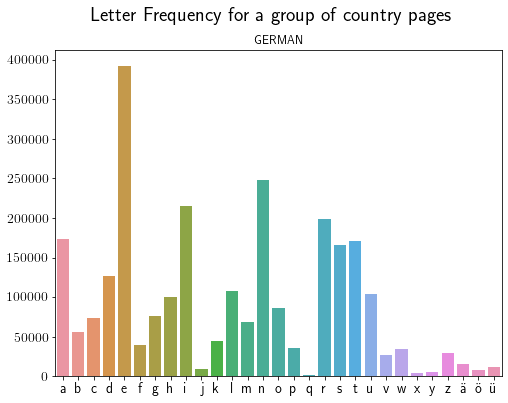

In [10]:
# without this import, umlaut characters are not displayed properly as xticks. weird!
from matplotlib import rcParams
rcParams['text.usetex'] = True

plt.figure(figsize=(8, 6))
g = sns.barplot(x=list(eu.index), y=eu.values, order=string.ascii_lowercase + "äöü");

plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.suptitle("Letter Frequency for a group of country pages", fontsize=20);
plt.title("GERMAN");

Let's compare country pages and pop star pages.

In [11]:
pop_urls = ['https://de.wikipedia.org/wiki/Katy_Perry',
           'https://de.wikipedia.org/wiki/Mariah_Carey',
           'https://de.wikipedia.org/wiki/Madonna_(K%C3%BCnstlerin)',
            'https://de.wikipedia.org/wiki/Adele_(S%C3%A4ngerin)',
            'https://de.wikipedia.org/wiki/Whitney_Houston',
            'https://de.wikipedia.org/wiki/C%C3%A9line_Dion',
            'https://de.wikipedia.org/wiki/Britney_Spears',
            'https://de.wikipedia.org/wiki/Shania_Twain',
            'https://de.wikipedia.org/wiki/Janet_Jackson',
            'https://de.wikipedia.org/wiki/Lady_Gaga',
            'https://de.wikipedia.org/wiki/Beyonc%C3%A9',
            'https://de.wikipedia.org/wiki/Rihanna',
            'https://de.wikipedia.org/wiki/Drake_(Rapper)',
            'https://de.wikipedia.org/wiki/Dua_Lipa',
            'https://de.wikipedia.org/wiki/Kanye_West',
            'https://de.wikipedia.org/wiki/Timbaland',
            'https://de.wikipedia.org/wiki/Jay-Z',
            'https://de.wikipedia.org/wiki/Pharrell_Williams',
            'https://de.wikipedia.org/wiki/Nicki_Minaj',
            'https://de.wikipedia.org/wiki/Missy_Elliott',
            'https://de.wikipedia.org/wiki/Cardi_B',
            'https://de.wikipedia.org/wiki/Justin_Bieber',
            'https://de.wikipedia.org/wiki/Michael_Jackson',
            'https://de.wikipedia.org/wiki/Ed_Sheeran',
            'https://de.wikipedia.org/wiki/Bruno_Mars',
            'https://de.wikipedia.org/wiki/Justin_Timberlake'
           ]

pop_counters = get_frequency_for_group(pop_urls)
pop = pd.Series(dict(np.sum(pop_counters)))

In [12]:
df_pop = pd.DataFrame(pop)
df_pop['cat'] = "pop"

In [13]:
df_eu = pd.DataFrame(eu)
df_eu['cat'] = "eu"

In [14]:
comparison = df_pop.append(df_eu)
comparison.columns = ['cnt', 'cat']

In [15]:
comparison.head()

,cnt,cat
k,12849,pop
a,63790,pop
t,61331,pop
y,7773,pop
p,18144,pop


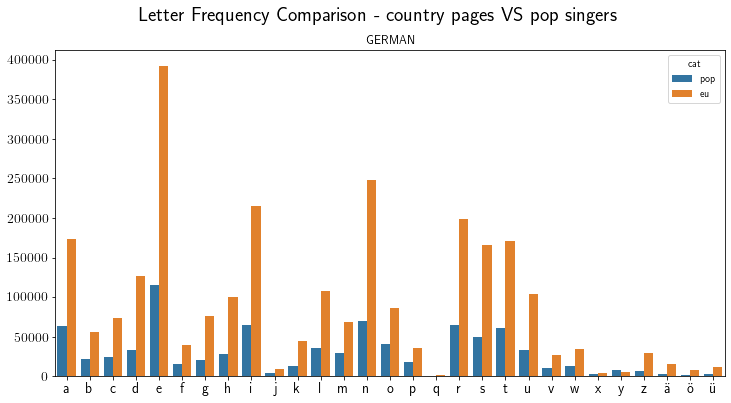

In [16]:
import string
plt.figure(figsize=(12, 6))
sns.barplot(x=list(comparison.index), y=list(comparison['cnt']), 
            hue=comparison['cat'], 
            order=string.ascii_lowercase + "äöü");

plt.suptitle("Letter Frequency Comparison - country pages VS pop singers", fontsize=20);
plt.title("GERMAN");
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

### WARNING:

Hmm, it doesn't look right. I see that the eu data points always have higher frequencies (counts), which is due to a longer wikipedia article. Length of article shouldn't influence such a comparison, so I would prefer to calculate the percentage share of each letter in the article.

In [17]:
df_pop.head()

,0,cat
k,12849,pop
a,63790,pop
t,61331,pop
y,7773,pop
p,18144,pop


In [18]:
df_pop.columns = ['cnt', 'cat']
df_pop['letter_share'] = df_pop['cnt'] / sum(df_pop.cnt)

In [19]:
df_eu.columns = ['cnt', 'cat']
df_eu['letter_share'] = df_eu['cnt'] / sum(df_eu.cnt)

In [20]:
df_eu.head()

,cnt,cat,letter_share
e,392156,eu,0.149300
n,247379,eu,0.094181
i,215339,eu,0.081983
r,198609,eu,0.075614
a,172942,eu,0.065842


In [21]:
comparison_perc = df_pop.append(df_eu)

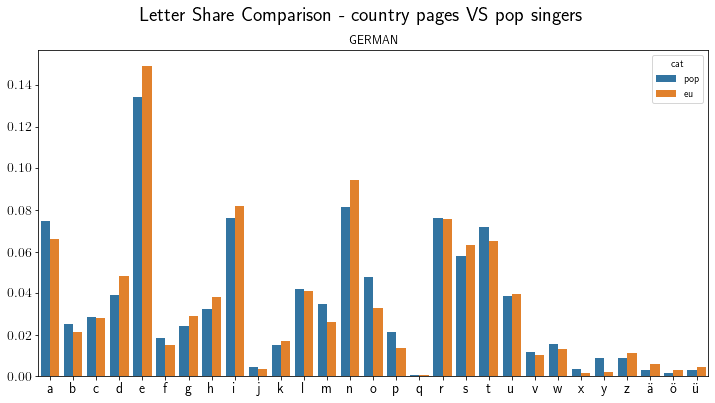

In [22]:
import string
plt.figure(figsize=(12, 6))
sns.barplot(x=list(comparison_perc.index), y=list(comparison_perc['letter_share']), 
            hue=comparison_perc['cat'], 
            order=string.ascii_lowercase + "äöü");

plt.suptitle("Letter Share Comparison - country pages VS pop singers", fontsize=20);
plt.title("GERMAN");
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

Okay, here we see that the values are much closer, across two semantically different article groups, belonging to the same language.

# Predicting the language

There are many way of doing it. Here, I will explore 2 of them:<br><br>
    1. Using machine learning<br>
    2. Using vector operations<br>

### 1. Method - using machine learning

ML is actually totally overkill for such a task, and so little data...  But let's give it a shot anyway.

First, we need to create a sort of dictionary for each language. This dictionary will serve as a template, against which we compare the pages we want to predict.

In [2]:
eng_eu_urls = ['https://en.wikipedia.org/wiki/Belgium',
          'https://en.wikipedia.org/wiki/Germany',
          'https://en.wikipedia.org/wiki/France',
          'https://en.wikipedia.org/wiki/Luxembourg',
          'https://en.wikipedia.org/wiki/Netherlands',
          'https://en.wikipedia.org/wiki/Denmark',
          'https://en.wikipedia.org/wiki/Ireland',
          'https://en.wikipedia.org/wiki/Greece',
          'https://en.wikipedia.org/wiki/Portugal',
          'https://en.wikipedia.org/wiki/Spain',
          'https://en.wikipedia.org/wiki/Finland',
          'https://en.wikipedia.org/wiki/Austria',
          'https://en.wikipedia.org/wiki/Sweden',
          'https://en.wikipedia.org/wiki/Estonia',
          'https://en.wikipedia.org/wiki/Latvia',
          'https://en.wikipedia.org/wiki/Lithuania',
          'https://en.wikipedia.org/wiki/Malta',
          'https://en.wikipedia.org/wiki/Poland',
          'https://en.wikipedia.org/wiki/Slovakia',
          'https://en.wikipedia.org/wiki/Czech_Republic',
          'https://en.wikipedia.org/wiki/Hungary',
          'https://en.wikipedia.org/wiki/Cyprus',
          'https://en.wikipedia.org/wiki/Bulgaria',
          'https://en.wikipedia.org/wiki/Romania',
          'https://en.wikipedia.org/wiki/Croatia']

de_eu_urls = ['https://de.wikipedia.org/wiki/Belgien',
          'https://de.wikipedia.org/wiki/Deutschland',
          'https://de.wikipedia.org/wiki/Frankreich',
          'https://de.wikipedia.org/wiki/Luxemburg',
          'https://de.wikipedia.org/wiki/Niederlande',
          'https://de.wikipedia.org/wiki/D%C3%A4nemark',
          'https://de.wikipedia.org/wiki/Irland',
          'https://de.wikipedia.org/wiki/Griechenland',
          'https://de.wikipedia.org/wiki/Portugal',
          'https://de.wikipedia.org/wiki/Spanien',
          'https://de.wikipedia.org/wiki/Finnland',
          'https://de.wikipedia.org/wiki/%C3%96sterreich',
          'https://de.wikipedia.org/wiki/Schweden',
          'https://de.wikipedia.org/wiki/Estland',
          'https://de.wikipedia.org/wiki/Lettland',
          'https://de.wikipedia.org/wiki/Litauen',
          'https://de.wikipedia.org/wiki/Malta',
          'https://de.wikipedia.org/wiki/Polen',
          'https://de.wikipedia.org/wiki/Slowakei',
          'https://de.wikipedia.org/wiki/Tschechien',
          'https://de.wikipedia.org/wiki/Ungarn',
          'https://de.wikipedia.org/wiki/Republik_Zypern',
          'https://de.wikipedia.org/wiki/Bulgarien',
          'https://de.wikipedia.org/wiki/Rum%C3%A4nien',
          'https://de.wikipedia.org/wiki/Kroatien']

In [3]:
eng_eu_counters = get_frequency_for_group(eng_eu_urls)
de_eu_counters = get_frequency_for_group(de_eu_urls)

### Just out of curiosity, let's plot the letter share between English and German.

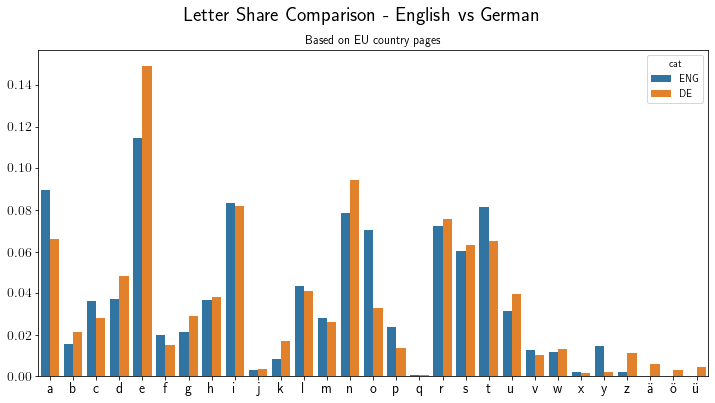

In [97]:
aggr_eng_eu_cnt = pd.Series(dict(np.sum(eng_eu_counters)))
aggr_de_eu_counters = pd.Series(dict(np.sum(de_eu_counters)))

train_eng = pd.DataFrame(aggr_eng_eu_cnt, columns=['cnt'])
train_de = pd.DataFrame(aggr_de_eu_counters, columns=['cnt'])

train_eng['letter_share'] = train_eng['cnt'] / sum(train_eng['cnt'])
train_eng['cat'] = "ENG"

train_de['letter_share'] = train_de['cnt'] / sum(train_de['cnt'])
train_de['cat'] = "DE"

lang_comparison = train_eng.append(train_de, sort=False)

import string

from matplotlib import rcParams
rcParams['text.usetex'] = True

plt.figure(figsize=(12, 6))
sns.barplot(x=list(lang_comparison.index), y=list(lang_comparison['letter_share']), 
            hue=lang_comparison['cat'], 
            order=string.ascii_lowercase + "äöü");

plt.suptitle("Letter Share Comparison - English vs German", fontsize=20);
plt.title("Based on EU country pages");
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

In [5]:
def counters_to_df(counters:list):
    df = pd.DataFrame()
    for cnt in counters:
        row = pd.DataFrame(pd.Series(dict(cnt))).T
        df = df.append(row, sort=False)
        df.columns = sorted(df.columns)
    return df

In [6]:
df_en = counters_to_df(eng_eu_counters)
df_de = counters_to_df(de_eu_counters)

In [7]:
def turn_counts_to_percentages(df):
    return df.apply(lambda x: x / sum(x), axis=1)

In [8]:
df_en = turn_counts_to_percentages(df_en)
df_de = turn_counts_to_percentages(df_de)

In [9]:
df_en['category'] = 0
df_de['category'] = 1

train = df_en.append(df_de)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

y = train['category']
train.drop(["category"], axis=1, inplace=True)
X = train

In [11]:
dt = DecisionTreeClassifier(random_state=5)
dt.fit(X, y)

knn = KNeighborsClassifier()
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
import eli5
eli5.show_weights(dt, top=5, feature_names=list(train.columns))

Ha! As expected, the umlauts are the giveaway. They totally override all other characters.

### Prediction time!

In [13]:
def ML_predict(url, model):
    to_predict = get_frequency_for_group([url])
    df_pred = counters_to_df(to_predict)
    df_pred = turn_counts_to_percentages(df_pred)
    if model.predict(df_pred)[0] == 0:
        lang = "English"
    else:
        lang = "German"
        
    proba = max(model.predict_proba(df_pred)[0])
    print(f"{url} predicted as {lang} with probability of {proba}")

In [14]:
to_predict = ['https://de.wikipedia.org/wiki/Russland',
             'https://en.wikipedia.org/wiki/Global_warming',
             'https://de.wikipedia.org/wiki/Globale_Erw%C3%A4rmung',
             'https://en.wikipedia.org/wiki/Tesla,_Inc.',
             'https://de.wikipedia.org/wiki/Shanghai',
             'https://de.wikipedia.org/wiki/Gegend%C3%A4mmerung',
             'https://en.wikipedia.org/wiki/Horizon',
             'https://en.wikipedia.org/wiki/Earth',
            'https://de.wikipedia.org/wiki/Tony_Hawk',
              'https://de.wikipedia.org/wiki/Wahrnehmung'
             ]

In [15]:
for url in to_predict:
    ML_predict(url, dt)

https://de.wikipedia.org/wiki/Russland predicted as German with probability of 1.0
https://en.wikipedia.org/wiki/Global_warming predicted as English with probability of 1.0
https://de.wikipedia.org/wiki/Globale_Erw%C3%A4rmung predicted as German with probability of 1.0
https://en.wikipedia.org/wiki/Tesla,_Inc. predicted as English with probability of 1.0
https://de.wikipedia.org/wiki/Shanghai predicted as German with probability of 1.0
https://de.wikipedia.org/wiki/Gegend%C3%A4mmerung predicted as English with probability of 1.0
https://en.wikipedia.org/wiki/Horizon predicted as English with probability of 1.0
https://en.wikipedia.org/wiki/Earth predicted as English with probability of 1.0
https://de.wikipedia.org/wiki/Tony_Hawk predicted as German with probability of 1.0
https://de.wikipedia.org/wiki/Wahrnehmung predicted as German with probability of 1.0


It did quite okay, but it got Gegendämmerung wrong. Because of very little data, and one feature overriding others, it always have 100% confidence in the prediction. It looks like this model does better than random guessing, but we would need to test it on a much bigger sample to know if it's as good as it looks at first sight.

### 2. Vector distance

If we use the mean percetage share of every letter per language, we could generalize every language into one vector. This vector would be a so to speak dictionary for that language. Then, we could compare a random page, and calculate the vector distance to english and german dictionary. Whichever dictionary is closer, this will be our choice.

In [16]:
df_en = counters_to_df(eng_eu_counters)
df_de = counters_to_df(de_eu_counters)

In [17]:
vector_en = np.sum(df_en, axis=0) / sum(np.sum(df_en, axis=0))
vector_de = np.sum(df_de, axis=0) / sum(np.sum(df_de, axis=0))

In [18]:
from scipy.spatial import distance
    
def vector_euclidean_predict(url, vector_de, vector_en):
    target = get_frequency_for_group([url])
    df_target = counters_to_df(target)
    vector_target = turn_counts_to_percentages(df_target).iloc[0]

    dist_en = distance.euclidean(vector_target, vector_en)
    dist_de = distance.euclidean(vector_target, vector_de)
    lang = "English" if dist_en < dist_de else "German"
    print(f"{url} predicted as {lang}")
    
for url in to_predict:
    vector_euclidean_predict(url, vector_de, vector_en)
    

https://de.wikipedia.org/wiki/Russland predicted as English
https://en.wikipedia.org/wiki/Global_warming predicted as English
https://de.wikipedia.org/wiki/Globale_Erw%C3%A4rmung predicted as English
https://en.wikipedia.org/wiki/Tesla,_Inc. predicted as German
https://de.wikipedia.org/wiki/Shanghai predicted as English
https://de.wikipedia.org/wiki/Gegend%C3%A4mmerung predicted as English
https://en.wikipedia.org/wiki/Horizon predicted as English
https://en.wikipedia.org/wiki/Earth predicted as English
https://de.wikipedia.org/wiki/Tony_Hawk predicted as English
https://de.wikipedia.org/wiki/Wahrnehmung predicted as English


Garbage results, this clearly isn't right. So what went wrong?

1. I think what happens here, is that the "usual" characters are hijacking the distance metric, so the ones that are really telling us a lot (äöü) are having less of an impact, their impact is spread out too thin. How about some feature selection?

2. Using vector distance is somewhat tricky, because the distance depends on the magnitude of the two values you compare. Let me illustrate. Let's say you compare the distance of two features:

In [27]:
distance.euclidean([0.003], [0.03])

0.027

In [28]:
distance.euclidean([0.22], [0.21])

0.010000000000000009

Here, the distance between 0.22 and 0.21 is greater than the distance between 0.003 and 0.03. So what is more interesting to us than distance, is how different the two vectors are. What about min(num1,num2) / max(num1, num2) ?

In [71]:
min([0.003, 0.03]) / max([0.003, 0.03]) 

0.1

In [72]:
min([0.22, 0.21]) / max([0.22, 0.21])

0.9545454545454545

### 2a. Feature selection

I will compare the two dictionaries - eng and de, and see which features differ the most, and I pick only those.

In [31]:
diff = pd.DataFrame()
diff['en'] = vector_en
diff['de'] = vector_de

In [32]:
diff['outliers_de'] = diff.de /  diff.en
diff['outliers_en'] = diff.en /  diff.de

In [33]:
diff.sort_values(by="outliers_de", ascending=False, inplace=True)

In [34]:
diff.head(5)

,en,de,outliers_de,outliers_en
ü,0.000101,0.004257,42.177768,0.023709
ä,0.000278,0.005877,21.113223,0.047364
ö,0.000170,0.003154,18.505868,0.054037
z,0.002335,0.010808,4.628969,0.216031
k,0.009256,0.018200,1.966247,0.508583


In [35]:
diff.sort_values(by="outliers_en", ascending=False, inplace=True)

In [36]:
diff.head(5)

,en,de,outliers_de,outliers_en
y,0.014043,0.002901,0.206618,4.839846
o,0.070371,0.032655,0.464038,2.154996
p,0.025515,0.014093,0.552332,1.810505
x,0.002202,0.001619,0.735385,1.359831
a,0.087504,0.064777,0.740274,1.350851


### Take 2: With feature selection

In [37]:
df_en = counters_to_df(eng_eu_counters)
df_de = counters_to_df(de_eu_counters)

vector_en = np.sum(df_en, axis=0) / sum(np.sum(df_en, axis=0))
vector_de = np.sum(df_de, axis=0) / sum(np.sum(df_de, axis=0))

In [38]:
vector_en = vector_en[vector_en.index.isin(['ä', 'ö', 'ü', 'z', 'y'])]
vector_de = vector_de[vector_de.index.isin(['ä', 'ö', 'ü', 'z', 'y'])]

In [93]:
def vector_similarity_predict(url, vector_de, vector_en):
    target = get_frequency_for_group([url])
    df_target = counters_to_df(target)
    vector_target = turn_counts_to_percentages(df_target).iloc[0]
    vector_target = vector_target[vector_target.index.isin(['ä', 'ö', 'ü', 'z', 'y'])]
    assert all(vector_target.index == vector_en.index)
    
    juxtapose_en = list(zip(vector_target.values, vector_en.values))
    juxtapose_de = list(zip(vector_target.values, vector_de.values))
    
    similarity_de = sum([ min(tup) / max(tup) for tup in juxtapose_de])
    similarity_en = sum([ min(tup) / max(tup) for tup in juxtapose_en])
    
    confidence = round(abs(similarity_de - similarity_en), 4)
    
    lang = "English" if similarity_en > similarity_de else "German"
    print(f"{url} predicted as {lang} by a margin of {confidence}")
    
for url in to_predict:
    vector_similarity_predict(url, vector_de, vector_en)

https://de.wikipedia.org/wiki/Russland predicted as German by a margin of 1.0404
https://en.wikipedia.org/wiki/Global_warming predicted as English by a margin of 0.3815
https://de.wikipedia.org/wiki/Globale_Erw%C3%A4rmung predicted as German by a margin of 0.8846
https://en.wikipedia.org/wiki/Tesla,_Inc. predicted as English by a margin of 0.6846
https://de.wikipedia.org/wiki/Shanghai predicted as German by a margin of 1.6696
https://de.wikipedia.org/wiki/Gegend%C3%A4mmerung predicted as German by a margin of 1.0066
https://en.wikipedia.org/wiki/Horizon predicted as English by a margin of 0.1035
https://en.wikipedia.org/wiki/Earth predicted as English by a margin of 1.3739
https://de.wikipedia.org/wiki/Tony_Hawk predicted as German by a margin of 0.8386
https://de.wikipedia.org/wiki/Wahrnehmung predicted as German by a margin of 0.3698


This looks better - it got all of them right. But again, testing on a much larger scale would need to take place to really see how good this model is.

To summarize: <br>
What helped, was feature selection, and using a similarity metric rather than the distance.

The confidence level is the difference between the similarities, as output above.

### In the ML part, why did I use DecisionTree model and not others ?

### Knn
I tried it initially actually. It compares vector distance between the target vector, and n other neighboring vectors. The problem with this model is that it treates each element of the vector with the same weight. Yes, you can assign weights to NEIGBORS depending how close they are, but not to different features (elements of the vector). Hence, the values of äöü are being watered down by values of other characters, which don't differ so much between languages.

### RandomForest

It's normally my go-to algorithm, but the problem is the random element in it. With every tree in a random forest, a random set of features, and random set of rows is selected. Normally, this makes the model more robust. But in our case, we had such strong features (öäü), that in the case of trees where those columns were not selected, the individual tree provided garbage predictions. And the final decision is a majority vote of individual trees, which was garbage as well. Garbage in, garbage out.

### AdaBoost

Is also a great one, which applies penalty for wrongly made predictions, but as it is based of random forest model, the same issues as above will hit us.